In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('test.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

<Axes: xlabel='median_house_value', ylabel='Count'>

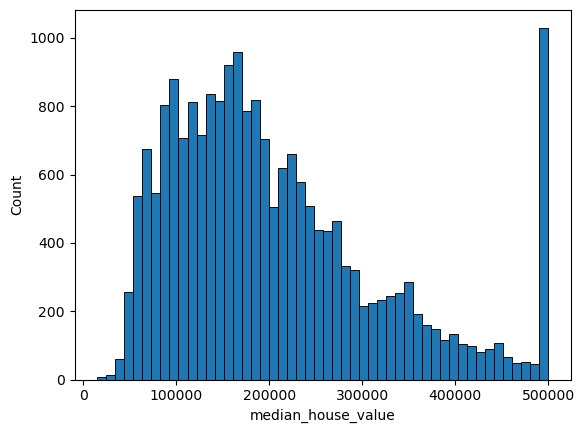

In [6]:
sns.histplot(df.median_house_value, bins=50, alpha=1)

**EDA**
- median_house_value does have a long tail

**Features**

In [23]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
df = df.drop('ocean_proximity', axis=1)

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Question 1**
total_bedrooms with 207 missing values

In [9]:
df.population.median()

1195.0

- question 2: median of population is 1195

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [24]:
def prepare_all_data(seed):
    np.random.seed(seed)
    n = len(df)

    n_test = int(n * 0.2)
    n_val = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled[: n_train].copy()
    df_val = df_shuffled[n_train : n_train + n_val].copy()
    df_test = df_shuffled[n_train + n_val :].copy()

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [29]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_all_data(42)
df_train_copy = df_train.copy()
df_val_copy = df_val.copy()
df_train_copy['total_bedrooms'] = df_train_copy['total_bedrooms'].fillna(0)
df_val_copy['total_bedrooms'] = df_val_copy['total_bedrooms'].fillna(0)

w_0, w = train_linear_regression(df_train_copy, y_train)
y_pred = w_0 + df_val_copy.dot(w)

score_0 = rmse(y_val, y_pred)
score_0 = np.round(score_0, 2)
print(score_0)

0.34


In [28]:
df_train_copy = df_train.copy()
df_val_copy = df_val.copy()
df_train_median = df_train_copy.fillna(df_train_copy.total_bedrooms.median())
df_val_median = df_val_copy.fillna(df_val_copy.total_bedrooms.median())

w_0, w = train_linear_regression(df_train_median, y_train)
y_pred = w_0 + df_val_median.dot(w)
score_median = rmse(y_val, y_pred)
score_median = round(score_0, 2)
print(score_median)

0.34


## Question 3 

both are equally good

## Linear Regrssion

In [30]:
def prepare_x(df):
    df = df.copy()
    df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
    
    return df
    

In [31]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [32]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [33]:
#option 1
df_train = prepare_x(df_train)
w_0, w = train_linear_regression(df_train, y_train)
y_pred = w_0 + df_val.dot(w)
score_0 = rmse(y_val, y_pred)
score_0 = round(score_0, 2)
print(score_0)

0.34


In [247]:
def prepare_x(df):
    df = df.copy()
    df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
    
    return df

In [248]:
#option 2
df_train = prepare_x(df_train)
w_0, w = train_linear_regression(df_train, y_train)
y_pred = w_0 + df_val.dot(w)
score_median = rmse(y_val, y_pred)
score_median = round(score_median, 2)
print(score_median)

0.34


## Question 3

both are equally good

In [34]:
def prepare_x(df):
    df = df.copy()
    df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
    
    return df

In [35]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [37]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_val.dot(w)
    score = rmse(y_val, y_pred)
    score = round(score, 2)
    print(r)
    print(score)
    print('------------')

0
0.34
------------
1e-06
0.34
------------
0.0001
0.34
------------
0.001
0.34
------------
0.01
0.34
------------
0.1
0.34
------------
1
0.34
------------
5
0.35
------------
10
0.35
------------


### Question 4

0.000001 is the best rmse with 0.32953303616496227


In [227]:
all_scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = prepare_all_data(s)
    df_train = prepare_x(df_train)
    w_0, w = train_linear_regression(df_train, y_train)
    y_pred = w_0 + df_val.dot(w)
    score_0 = rmse(y_val, y_pred)
    all_scores.append(score_0)
    score_0 = round(score_0, 3)
    print(s)
    print(score_0)
    print('-----------')

0
0.339
-----------
1
0.336
-----------
2
0.332
-----------
3
0.34
-----------
4
0.339
-----------
5
0.344
-----------
6
0.346
-----------
7
0.338
-----------
8
0.347
-----------
9
0.336
-----------


In [228]:
print(round(np.std(all_scores),3))

0.004


### Question 5 

0.005

In [239]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_all_data(9)

df_combined = df_train.append(df_val)
y_combined = np.concatenate([y_train, y_val])
df_combined['total_bedrooms'] = df_combined['total_bedrooms'].fillna(0)

C:\Users\refael.y\AppData\Local\Temp\ipykernel_19532\462218786.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_train.append(df_val)


In [244]:
w_0, w = train_linear_regression(df_combined, y_combined)
print(w_0)
y_pred = w_0 + df_test.dot(w)
score = rmse(y_test, y_pred)
score = round(score, 2)
print(score)

-11.419659426702339
0.35


### Question 6

0.35